**Datase**t: contains medical information of children with genetic diseases.
Source: https://www.kaggle.com/datasets/aryarishabh/of-genomes-and-genetics-hackerearth-ml-challenge
**Objective**: Identify the type of genetic disorder based on predictors in the dataset.

Baby with mitochrondria from a 3rd person: https://www.nbcnews.com/health/health-news/babies-dna-three-different-people-born-first-time-uk-rcna83788



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  classification_report, confusion_matrix, recall_score, precision_score
from sklearn import tree, ensemble
from xgboost import XGBClassifier
from IPython.display import Image
import pydotplus # Packages for rendering the tree
import graphviz # Packages for rendering the tree
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [ ]:

url = 'https://github.com/Manta88/DS/blob/main/train.csv?raw=true'

train = pd.read_csv(url)


In [ ]:
train['Genetic Disorder']

0         Mitochondrial genetic inheritance disorders
1                                                 NaN
2        Multifactorial genetic inheritance disorders
3         Mitochondrial genetic inheritance disorders
4        Multifactorial genetic inheritance disorders
                             ...                     
22078     Mitochondrial genetic inheritance disorders
22079    Multifactorial genetic inheritance disorders
22080     Mitochondrial genetic inheritance disorders
22081                                             NaN
22082    Multifactorial genetic inheritance disorders
Name: Genetic Disorder, Length: 22083, dtype: object

In [ ]:
le = LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
# le.fit(["paris", "paris", "amsterdam", "tokyo"])
# list(le.classes_)

le.transform(["tokyo", "tokyo", "amsterdam"])

# list(le.inverse_transform([2, 1, 0]))

array([2, 2, 0])

In [ ]:
train['Genetic Disorder'].value_counts()

Mitochondrial genetic inheritance disorders     10202
Single-gene inheritance diseases                 7664
Multifactorial genetic inheritance disorders     2071
Name: Genetic Disorder, dtype: int64

In [ ]:
le = LabelEncoder()
le.fit(train['Genetic Disorder'])


LabelEncoder()

In [ ]:
le.transform(["Mitochondrial genetic inheritance disorders", "Multifactorial genetic inheritance disorders", "Single-gene inheritance diseases"])

array([0, 1, 2])

In [ ]:
df = train.copy()

Data Cleaning - deleting unnecessary columns. Dropping Test 1-5 and Symptom 1-5 because there are not enough information.

In [ ]:
df.drop(["Patient Id","Patient First Name","Family Name","Father's name","Location of Institute",
          "Institute Name","Test 1","Test 2","Test 3","Test 4","Test 5","Symptom 1","Symptom 2",
           "Symptom 3","Symptom 4","Symptom 5"],inplace=True,axis=1)

In [ ]:
df = df.rename(columns = {'Patient Age': 'Patient_Age',
                          "Genes in mother's side": "Genes_in_mothers_side",
                          'Inherited from father':'Inherited_from_father',
                          'Maternal gene':'Maternal_gene',
                          'Paternal gene':'Paternal_gene',
                          'Blood cell count (mcL) ':'Blood_cell_count',
                          "Father's age":'Fathers_age',
                          "Mother's age":'Mothers_age',
                          'Respiratory Rate (breaths/min)':'Respiratory_Rate',
                          'Heart Rate (rates/min':'Heart_Rate',
                          'Parental consent': 'Parental_consent',
                          'Follow-up':'Follow_up',
                          'Birth asphyxia':'Birth_asphyxia',
                          'Autopsy shows birth defect (if applicable)': 'Autopsy_shows_birth_defect',
                          'Folic acid details (peri-conceptional)':'Folic_acid_details',
                          'H/O serious maternal illness':'HO_serious_maternal_illness',
                          'H/O radiation exposure (x-ray)':'HO_radiation_exposure',
                          'H/O substance abuse':'HO_substance_abuse',
                          'Assisted conception IVF/ART':'Assisted_conception_IVFART',
                          'History of anomalies in previous pregnancies':'History_of_anomalies_in_previous_pregnancies',
                          'No. of previous abortion':'No_of_previous_abortion',
                          'Birth defects':'Birth_defects',
                          'White Blood cell count (thousand per microliter)':'White_Blood_cell_count',
                          'Blood test result':'Blood_test_result',
                          'Genetic Disorder':'Genetic_Disorder',
                          'Disorder Subclass':'Disorder_Subclass',
                          'Blood cell count (mcL)': 'Blood_cell_count'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 29 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Patient_Age                                   20656 non-null  float64
 1   Genes_in_mothers_side                         22083 non-null  object 
 2   Inherited_from_father                         21777 non-null  object 
 3   Maternal_gene                                 19273 non-null  object 
 4   Paternal_gene                                 22083 non-null  object 
 5   Blood_cell_count                              22083 non-null  float64
 6   Mothers_age                                   16047 non-null  float64
 7   Fathers_age                                   16097 non-null  float64
 8   Status                                        22083 non-null  object 
 9   Respiratory_Rate                              19934 non-null 

In [ ]:
# find missing values
df.isnull().sum()*100/df.isnull().count()

Patient_Age                                      6.461984
Genes_in_mothers_side                            0.000000
Inherited_from_father                            1.385681
Maternal_gene                                   12.724720
Paternal_gene                                    0.000000
Blood_cell_count                                 0.000000
Mothers_age                                     27.333243
Fathers_age                                     27.106824
Status                                           0.000000
Respiratory_Rate                                 9.731468
Heart_Rate                                       9.568446
Parental_consent                                 9.622787
Follow_up                                        9.808450
Gender                                           9.840149
Birth_asphyxia                                   9.686184
Autopsy_shows_birth_defect                       4.646108
Place of birth                                   9.618258
Folic_acid_det

In [ ]:
# drop mother's and father's age column since 27% is Nans
df.drop(['Fathers_age', 'Mothers_age'], inplace=True, axis=1)

Printing out the unique values of each categorical variable to see if any needs to be replaced by Nans. Column 'birth asphyxia', 'autopsy shows birth defect', H/O radiation exposure' and H/O substance abuse has values that should be replaced to nan

In [ ]:
for col in df:
  if df[col].dtype == 'object':
    for val in df[col].unique():
      print('unique value of {} are: {}'.format(col, val))

unique value of Genes_in_mothers_side are: Yes
unique value of Genes_in_mothers_side are: No
unique value of Inherited_from_father are: No
unique value of Inherited_from_father are: Yes
unique value of Inherited_from_father are: nan
unique value of Maternal_gene are: Yes
unique value of Maternal_gene are: No
unique value of Maternal_gene are: nan
unique value of Paternal_gene are: No
unique value of Paternal_gene are: Yes
unique value of Status are: Alive
unique value of Status are: Deceased
unique value of Respiratory_Rate are: Normal (30-60)
unique value of Respiratory_Rate are: Tachypnea
unique value of Respiratory_Rate are: nan
unique value of Heart_Rate are: Normal
unique value of Heart_Rate are: Tachycardia
unique value of Heart_Rate are: nan
unique value of Parental_consent are: Yes
unique value of Parental_consent are: nan
unique value of Follow_up are: High
unique value of Follow_up are: Low
unique value of Follow_up are: nan
unique value of Gender are: nan
unique value of Gen

In [ ]:
df['Birth_asphyxia'] = df['Birth_asphyxia'].replace("No record", np.NaN)
df['Birth_asphyxia'] = df['Birth_asphyxia'].replace("Not available", np.NaN)

df['Autopsy_shows_birth_defect'] = df['Autopsy_shows_birth_defect'].replace("Not applicable", np.NaN)
df['Autopsy_shows_birth_defect'] = df['Autopsy_shows_birth_defect'].replace("None", np.NaN)


In [ ]:
df['HO_radiation_exposure'] = df['HO_radiation_exposure'].replace("Not applicable", np.NaN)
df['HO_radiation_exposure'] = df['HO_radiation_exposure'].replace("-", np.NaN)

df['HO_substance_abuse'] = df['HO_substance_abuse'].replace("Not applicable", np.NaN)
df['HO_substance_abuse'] = df['HO_substance_abuse'].replace("-", np.NaN)

In [ ]:
print("INFO:\n")
df.info()

INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 27 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Patient_Age                                   20656 non-null  float64
 1   Genes_in_mothers_side                         22083 non-null  object 
 2   Inherited_from_father                         21777 non-null  object 
 3   Maternal_gene                                 19273 non-null  object 
 4   Paternal_gene                                 22083 non-null  object 
 5   Blood_cell_count                              22083 non-null  float64
 6   Status                                        22083 non-null  object 
 7   Respiratory_Rate                              19934 non-null  object 
 8   Heart_Rate                                    19970 non-null  object 
 9   Parental_consent                              19958 no

In [ ]:
print('BASIC CORRELATION: \n')
df.corr()

BASIC CORRELATION: 



,Patient_Age,Blood_cell_count,No_of_previous_abortion,White_Blood_cell_count
Patient_Age,1.000000,0.010819,-0.007281,-0.008489
Blood_cell_count,0.010819,1.000000,-0.005995,-0.001037
No_of_previous_abortion,-0.007281,-0.005995,1.000000,0.003807
White_Blood_cell_count,-0.008489,-0.001037,0.003807,1.000000


In [ ]:
for col in df:
  if df[col].dtype == 'object':
    print('value counts of {} are: \n {} '.format(col, df[col].value_counts()))

value counts of Genes_in_mothers_side are: 
 Yes    13143
No      8940
Name: Genes_in_mothers_side, dtype: int64 
value counts of Inherited_from_father are: 
 No     13133
Yes     8644
Name: Inherited_from_father, dtype: int64 
value counts of Maternal_gene are: 
 Yes    10647
No      8626
Name: Maternal_gene, dtype: int64 
value counts of Paternal_gene are: 
 No     12508
Yes     9575
Name: Paternal_gene, dtype: int64 
value counts of Status are: 
 Alive       11083
Deceased    11000
Name: Status, dtype: int64 
value counts of Respiratory_Rate are: 
 Normal (30-60)    10065
Tachypnea          9869
Name: Respiratory_Rate, dtype: int64 
value counts of Heart_Rate are: 
 Normal         10187
Tachycardia     9783
Name: Heart_Rate, dtype: int64 
value counts of Parental_consent are: 
 Yes    19958
Name: Parental_consent, dtype: int64 
value counts of Follow_up are: 
 Low     10040
High     9877
Name: Follow_up, dtype: int64 
value counts of Gender are: 
 Ambiguous    6695
Male         6666

Looking at the completeness of data for each column

<Axes: >

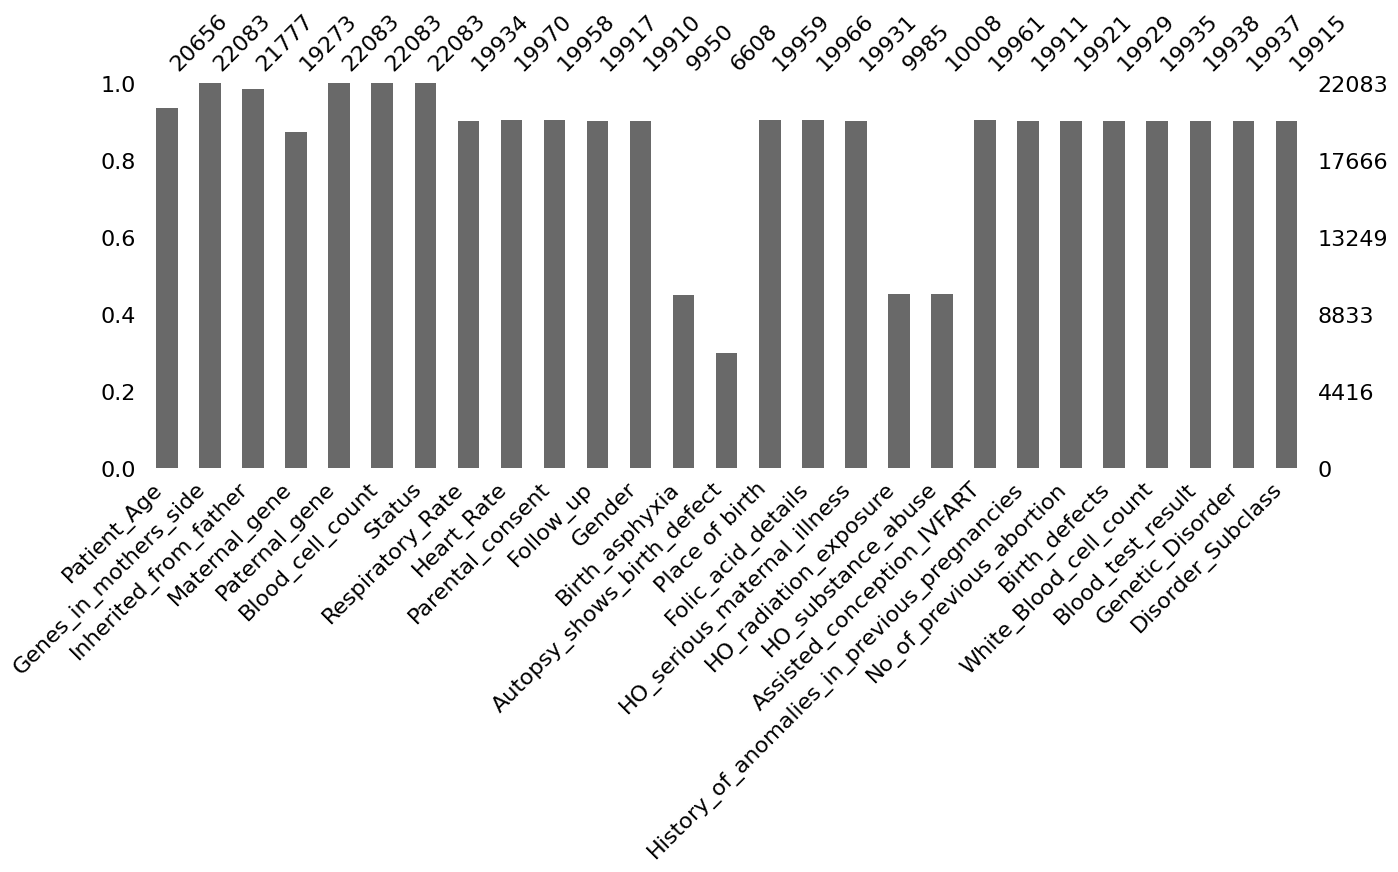

In [ ]:
msno.bar(df, figsize=(15,5))


Drop columns where more than half of the rows are Nans: Birth asphyxia, autopsy show birth defect, HO radiation exposure and HO substance abuse

In [ ]:
df.drop(['Birth_asphyxia', 'Autopsy_shows_birth_defect', 'HO_radiation_exposure', 'HO_substance_abuse'], inplace=True, axis=1)

In [ ]:
df.dropna(inplace=True)

Feature engineering

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_Age,7714.0,6.908089,4.343775,0.00000,3.000000,7.000000,11.000000,14.000000
Blood_cell_count,7714.0,4.899568,0.199829,4.14623,4.765419,4.898510,5.034793,5.609829
No_of_previous_abortion,7714.0,2.004148,1.408052,0.00000,1.000000,2.000000,3.000000,4.000000
White_Blood_cell_count,7714.0,7.455189,2.650463,3.00000,5.396682,7.421427,9.471831,12.000000


<Axes: xlabel='Patient_Age'>

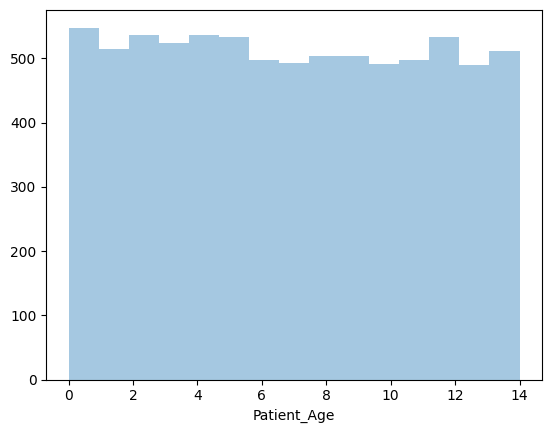

In [ ]:
sns.distplot(df['Patient_Age'], bins =15, kde=False)

Patient age
-  ranges from 0 to 14
- has an even distribution




([<matplotlib.patches.Wedge at 0x7fa7eb6ed270>,
 [Text(-1.0994450446911026, -0.03493699621003003, 'Mitochondrial genetic inheritance disorders'),
  Text(1.051349966091797, -0.32351699924235383, 'Single-gene inheritance diseases'),
  Text(0.3567455373611811, 1.0405443871228572, 'Multifactorial genetic inheritance disorders')],
 [Text(-0.5996972971042377, -0.01905654338728911, '51.0%'),
  Text(0.573463617868253, -0.1764638177685566, '38.5%'),
  Text(0.19458847492428058, 0.5675696657033765, '10.5%')])

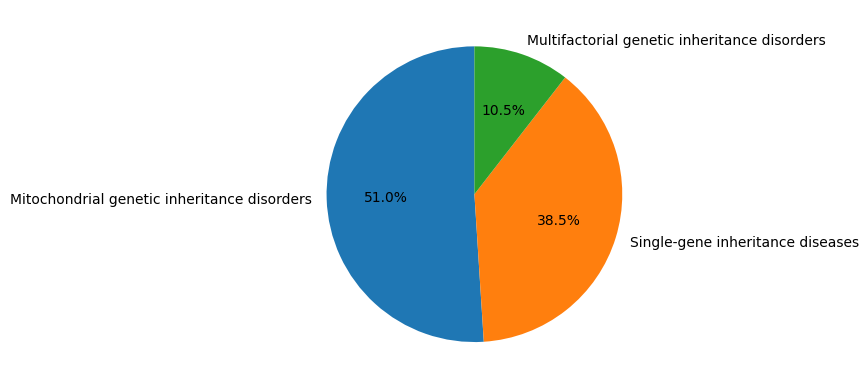

In [ ]:
label='Mitochondrial genetic inheritance disorders', 'Single-gene inheritance diseases', 'Multifactorial genetic inheritance disorders'
plt.pie(df['Genetic_Disorder'].value_counts(), autopct='%1.1f%%', labels=label, startangle=90)

Distribution of dependent variable is uneven. Mitochondrial genetic inheritance diorders has the highest occurance (51%), followed by single-gene inheritance diseases (38.5%), and multifactorial genetic inheritance disorder (10.5%)

In [ ]:
encoded = df.copy()

In [ ]:
# encode categorical variables
for column in encoded.columns:
    if encoded[column].dtype == 'object':
        # create a LabelEncoder object and fit it to the column data
        encoder = LabelEncoder()
        encoder.fit(encoded[column])

        # transform the column data using the encoder
        encoded[column] = encoder.transform(encoded[column])

Text(0.5, 1.0, 'Boxplot of blood cell count')

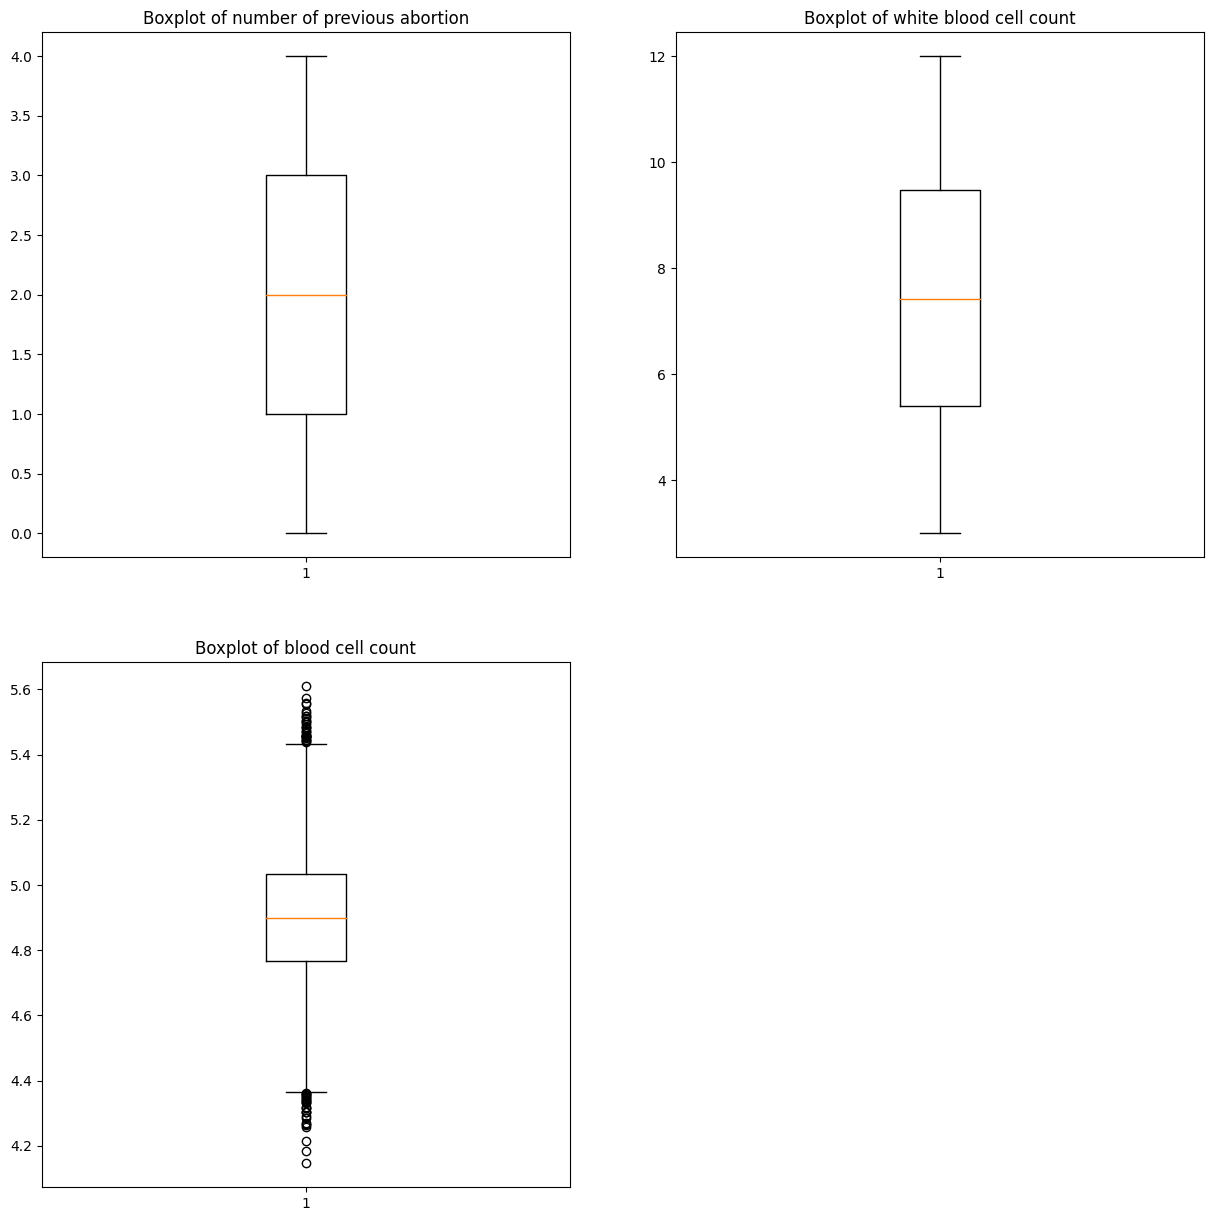

In [ ]:
# look for outliers in numeric variables
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.boxplot(df.No_of_previous_abortion)
plt.title('Boxplot of number of previous abortion')

plt.subplot(2,2,2)
plt.boxplot(df['White_Blood_cell_count'])
plt.title('Boxplot of white blood cell count')

plt.subplot(2,2,3)
plt.boxplot(df['Blood_cell_count'])
plt.title('Boxplot of blood cell count')

 Blood cell count seems to have outliers, especially on the lower end of the data and this is reflected in the distribution plot below.

On the other hand, distribution plot of 'White Blood Cell Count' reveals an interesting pattern. Considering the healthy range of white blood cell falls between the range 4,000 to 11,000. A significant number of patients have abnormal levels of white blood cell count. In addition, normal test reveals that its distribution is not normal.


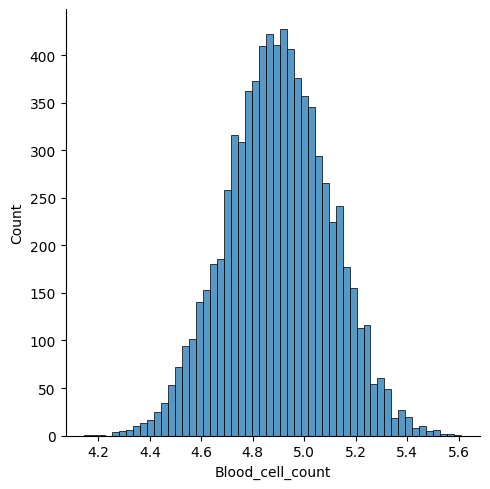

In [ ]:
sns.displot(df['Blood_cell_count'])

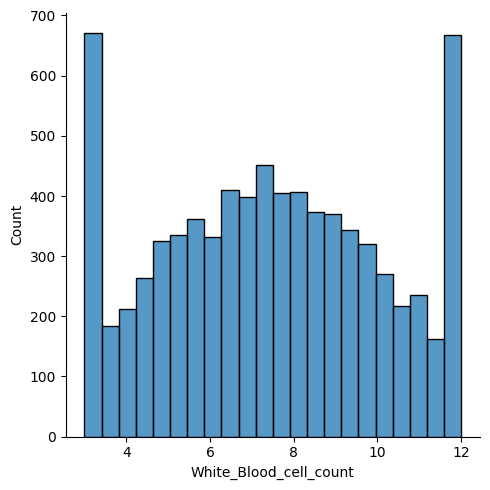

In [ ]:
sns.displot(df['White_Blood_cell_count'])

In [ ]:
from scipy.stats import normaltest

white_bc = normaltest(df['White_Blood_cell_count'])
blood_cell_count = normaltest(df['Blood_cell_count'])
previous_abortion = normaltest(df['No_of_previous_abortion'])

print(f'P value of normal test of White_blood_cell count is: {white_bc[1]:.3f}')
print(f'P value of normal test of Blood cell count is: {blood_cell_count[1]:.3f}')
print(f'P value of normal test of No_of_previous_abortion is: {previous_abortion[1]:.3f}')

P value of normal test of White_blood_cell count is: 0.000
P value of normal test of Blood cell count is: 0.760
P value of normal test of No_of_previous_abortion is: 0.000


Variable White_blood_cell_count and No_of_previous_abortion are not normally distributed so log transformation is performed.

In [ ]:
df['White_Blood_cell_count'] = np.log(df['White_Blood_cell_count'])


In [ ]:
normaltest(df['White_Blood_cell_count'])

NormaltestResult(statistic=573.9666683421826, pvalue=2.3159094310096217e-125)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7714 entries, 8 to 22082
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Patient_Age                                   7714 non-null   float64
 1   Genes_in_mothers_side                         7714 non-null   object 
 2   Inherited_from_father                         7714 non-null   object 
 3   Maternal_gene                                 7714 non-null   object 
 4   Paternal_gene                                 7714 non-null   object 
 5   Blood_cell_count                              7714 non-null   float64
 6   Status                                        7714 non-null   object 
 7   Respiratory_Rate                              7714 non-null   object 
 8   Heart_Rate                                    7714 non-null   object 
 9   Parental_consent                              7714 non-null   

Column description:
- Genes_in_mothers_side  : represents a gene defect in patient's mother
- Maternal_gene: represents a gene defect in the patient's maternal side of the family
- Status: represents whether patient is deceased
- Parental_consent: represents whether a patient's parents approved the treatment plan
- Follow up: represents the patient's level of risk (i.e., how intense their condition is)
autopsy show birth defect
- Folic acid details (peri-conceptional): Represents the preiconceptional folic acid supplementation details of a patient
- HO_serious_maternal_illness: Represents an unexpected outcome of labor and delivery that resulted in significant short or long-term consequences to a patient's mother
- Assisted conception IVFART: Respresents the type of treatment used for infertility


In [ ]:
Corr_Pearson = encoded.corr(method='pearson')

Text(0.5, 1.0, 'Pearson correlation heat map')

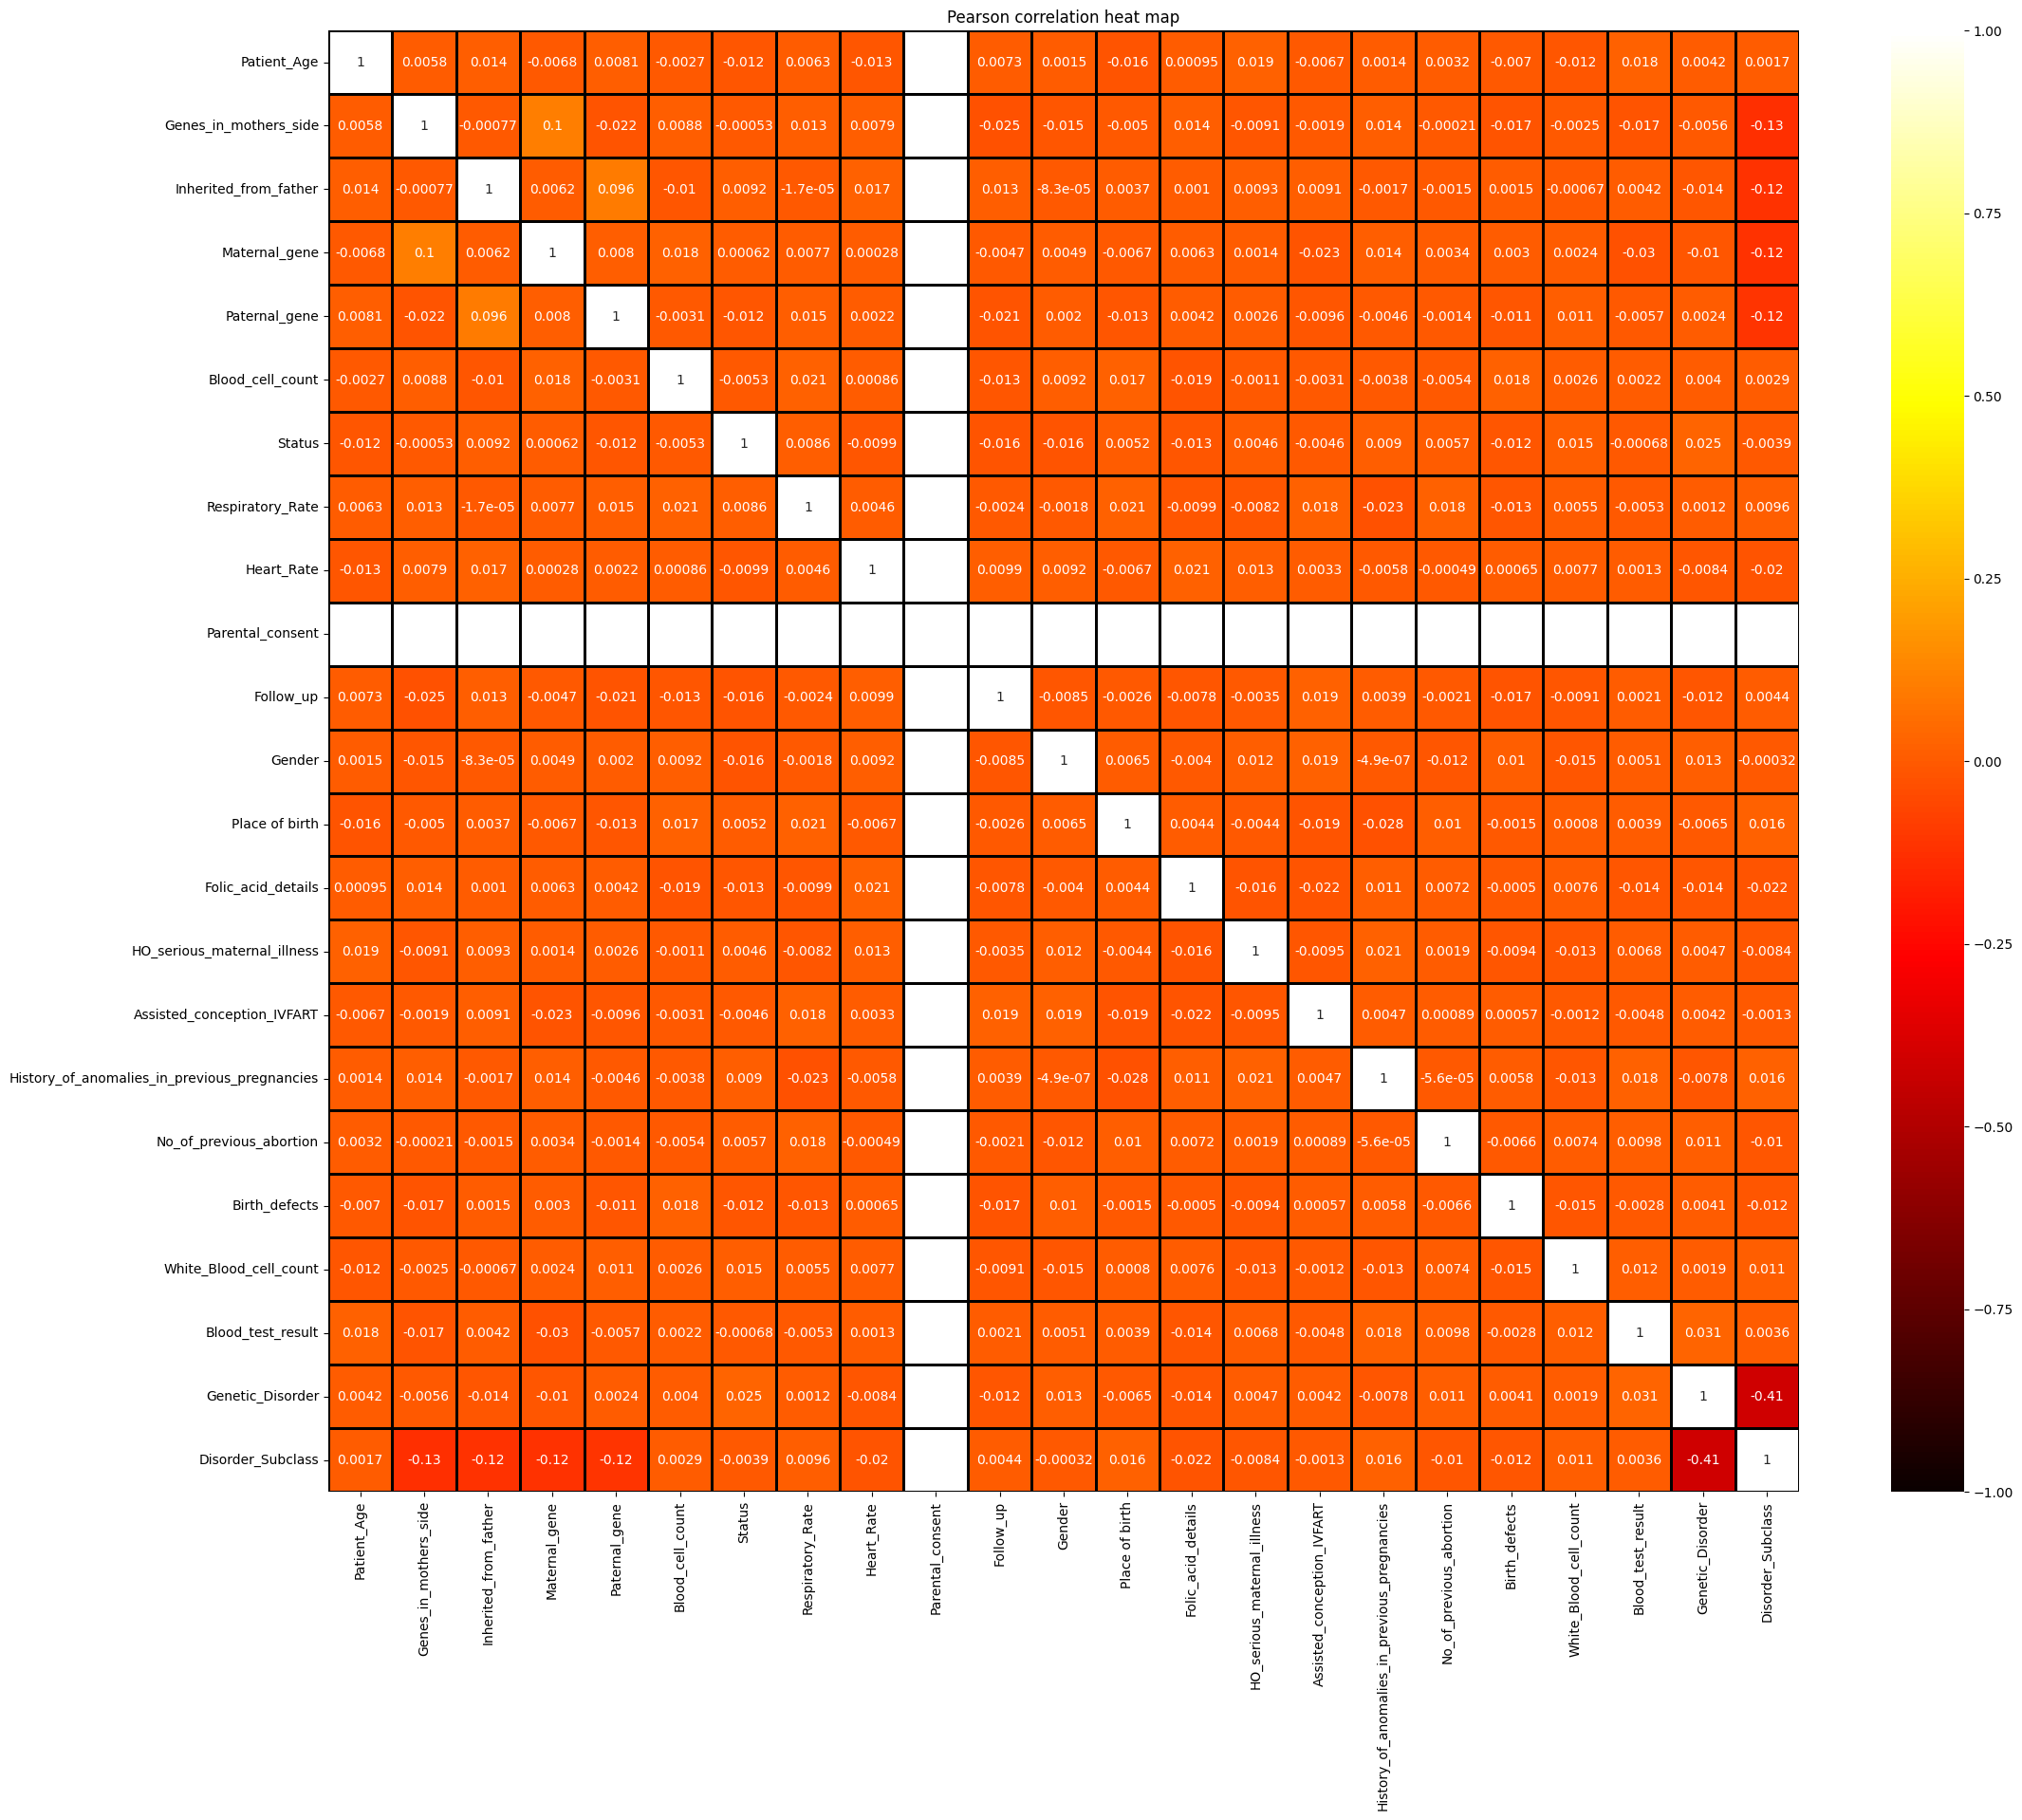

In [ ]:
fig = plt.figure(figsize=(25,20))
sns.heatmap(Corr_Pearson, annot=True, vmin=-1, center=0, vmax=1, linewidths=2, linecolor='black', cmap='hot')
plt.title("Pearson correlation heat map")

Model Generation

In [ ]:
X = encoded.drop(['Disorder_Subclass', 'Genetic_Disorder'], axis = 1)
Y = encoded['Genetic_Disorder']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True, stratify=Y)
# since dataset is imbalanced, set stratify to Y so that the proportion of label values in the samples will reflect that of the dataset

In [ ]:
print('X train shape:', X_train.shape)
print('X test shape:', X_test.shape)
print('Y train shape:', Y_train.shape)
print('Y test shape:', Y_test.shape)

X train shape: (6171, 21)
X test shape: (1543, 21)
Y train shape: (6171,)
Y test shape: (1543,)


In [ ]:
# Normalizing
Scaler_function = StandardScaler()

X_train = Scaler_function.fit_transform(X_train)
X_test = Scaler_function.fit_transform(X_test)

First model: logistic regression - 1. OvR multiclass classifier

In [ ]:
lr_clf = LogisticRegression(solver='lbfgs', multi_class='ovr', random_state=53)
lr_clf.fit(X_train, Y_train)
ovr_prob = lr_clf.predict_proba(X_test)


In [ ]:
ovr_prob

array([[0.56869335, 0.05015326, 0.3811534 ],
       [0.52159964, 0.07382435, 0.40457601],
       [0.46938777, 0.1998926 , 0.33071962],
       ...,
       [0.51938897, 0.1602937 , 0.32031733],
       [0.50790385, 0.03258623, 0.45950992],
       [0.48648968, 0.14908914, 0.36442118]])

In [ ]:
# Cross validation
print(cross_val_score(lr_clf, X_train, Y_train, cv=5).mean())

0.516124252783811


In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

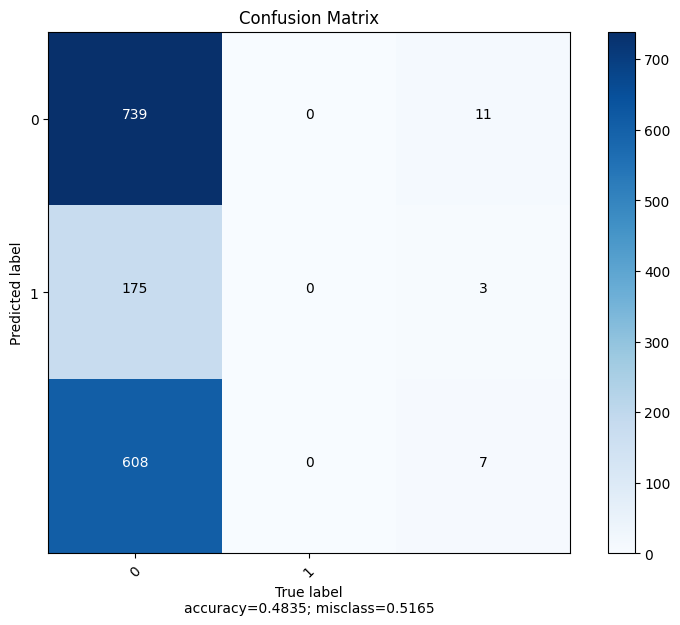

In [ ]:
confusion = confusion_matrix(Y_test, lr_clf.predict(X_test))
plot_confusion_matrix(cm=confusion, target_names=[i for i in range(2)], title='Confusion Matrix', normalize=False)

Second model: multiple linear regression

In [ ]:
# add a constant term to the independent variables
X_tr_constant = sm.add_constant(X_train)

mlr = sm.OLS(Y_train, X_tr_constant).fit()

X_test_constant = sm.add_constant(X_test)
y_pred = mlr.predict(X_test_constant)

print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:       Genetic_Disorder   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.200
Date:                Thu, 04 May 2023   Prob (F-statistic):              0.243
Time:                        17:22:06   Log-Likelihood:                -8347.2
No. Observations:                6171   AIC:                         1.674e+04
Df Residuals:                    6150   BIC:                         1.688e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8652      0.012     72.499      0.0

model 3 -- knn

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print('accuracy score:', accuracy)

accuracy score: 0.43681140635126375


In [ ]:
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')

In [ ]:
# Find the optimal k value
k_values = [i for i in range (1,30)]
scores = []

X = Scaler_function.fit_transform(X)

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, X, Y, cv =5)
  scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy scores')

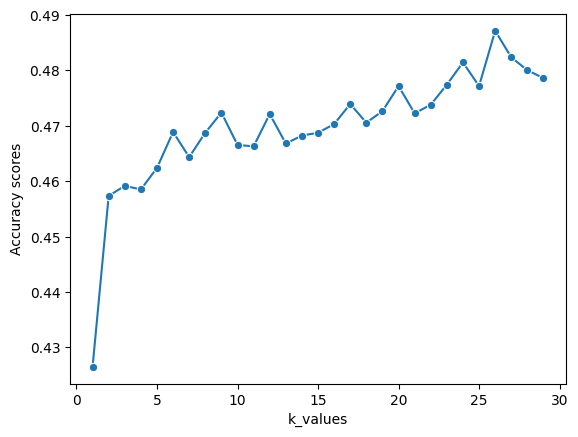

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel('k_values')
plt.ylabel('Accuracy scores')

k cluster at 27 seems to give higher accuracy score

Model 4 - Decision Tree

In [ ]:
df_labels_dropped = df.drop(['Genetic_Disorder','Disorder_Subclass'], axis =1)

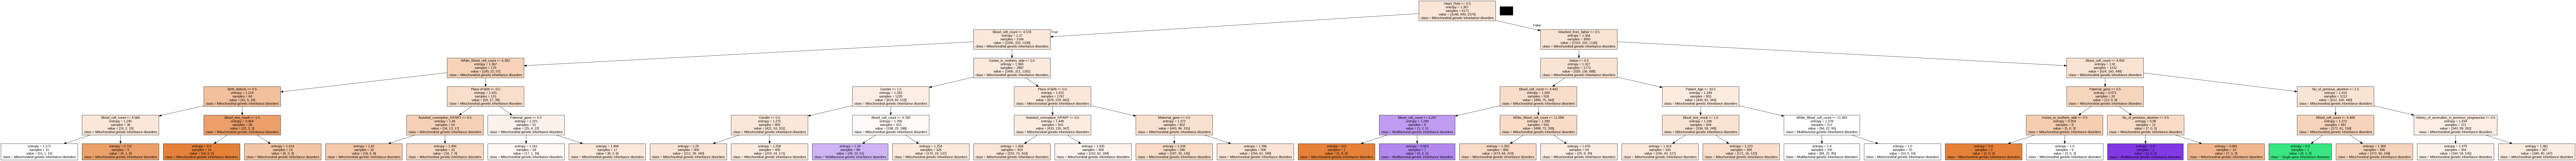

In [ ]:
from sklearn import tree

from IPython.display import Image

# Packages for rendering the tree
import pydotplus
import graphviz

# initialize and train the tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=3,
    max_depth=5
)
decision_tree.fit(X_train, Y_train)

# render the tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=df_labels_dropped.columns,
    class_names=['Mitochondrial genetic inheritance disorders',
                 'Single-gene inheritance diseases',
                 'Multifactorial genetic inheritance disorders'],
                 filled=True
)
graph= pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())





In [ ]:
y_pred = decision_tree.predict(X_test)

In [ ]:
accuracy_tree = accuracy_score(Y_test, y_pred)
print(f"accuracy: {accuracy_tree:.3f}")

accuracy: 0.500


model 5 - random forest

In [ ]:
rfc = RandomForestClassifier(n_estimators=600, criterion="gini")
rfc.fit(X_train, Y_train)
# make predictions on the test set
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
confusion = confusion_matrix(Y_test, y_pred)

print(f'accuracy: {accuracy:.3f}')
print('confusion matrix {}'.format(confusion))


accuracy: 0.509
confusion matrix [[680   2 105]
 [143   0  19]
 [488   0 106]]


<Axes: title={'center': 'Feature Importance'}>

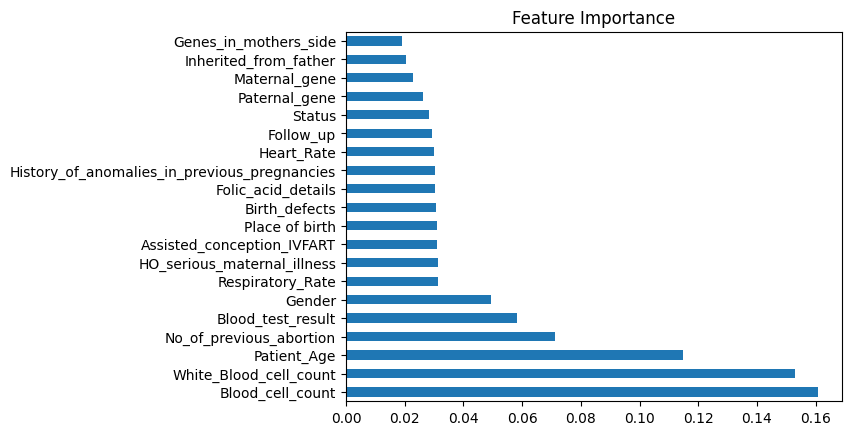

In [ ]:
feature_importance = pd.Series(rfc.feature_importances_, index=encoded.drop(['Genetic_Disorder', 'Disorder_Subclass'], axis=1).columns)
feature_importance.nlargest(20).plot(kind='barh', title='Feature Importance')

Model 6 - gradient boosting model

In [ ]:
params = {'n_estimators': 500,
          'max_depth': 3,
          'loss': 'log_loss'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, Y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

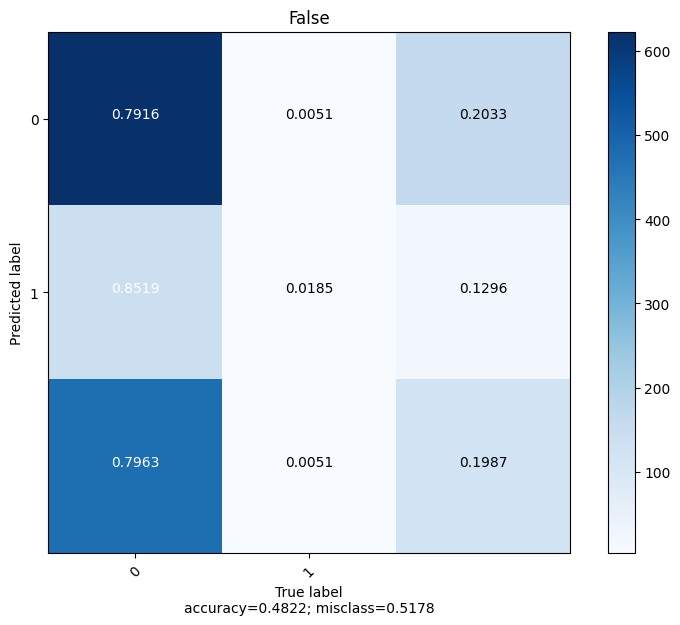

In [ ]:
cm = confusion_matrix(Y_test, predict_test)
plot_confusion_matrix(cm, [0,1], False)

In [ ]:
clf.score(X_test, Y_test)

0.48217757615035645

In [ ]:
y_pred = clf.predict(X_test)
precision = precision_score(Y_test, y_pred, average='macro')
print(f"Precision: {precision:.3f}")

Precision: 0.400


Model 7 -- XG booster

In [ ]:
xgb = XGBClassifier(random_state=42)
# fit classifier to the training data
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
# evaluate model performance
accuracy = accuracy_score(Y_test, y_pred)
print(f"accuracy: {accuracy:.3f}")

accuracy: 0.471


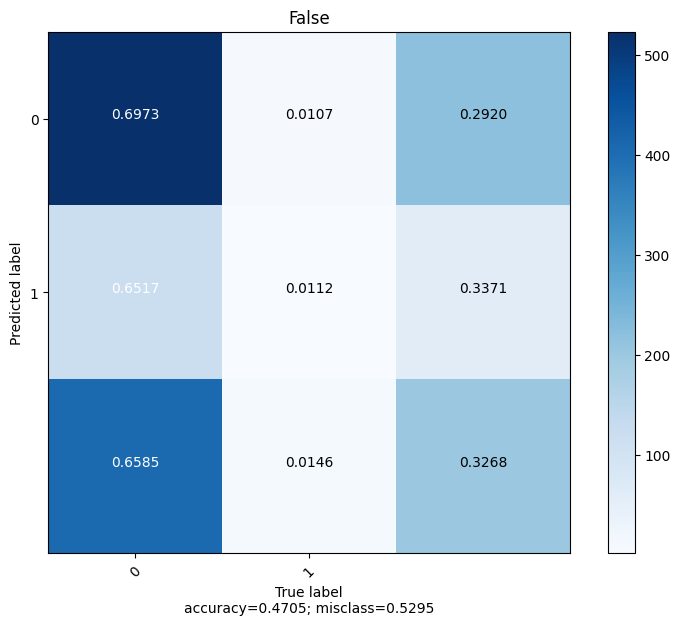

In [ ]:
cm2 = confusion_matrix(Y_test, y_pred)
plot_confusion_matrix(cm2, [0,1], False)

Comparing model performance

In [ ]:
models = [lr_clf, decision_tree, rfc, clf]

In [ ]:
for model in models:
    name = model.__class__.__name__
    predict = model.predict(X_test)
    R2CV = cross_val_score(model,X_test,Y_test,cv=10).mean()
    error = -cross_val_score(model,X_test,Y_test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    print(name + ": ")
    print("-" * 10)
    print("ACC-->",accuracy_score(Y_test,predict))
    print("R2CV-->",R2CV)
    print("MEAN SQUARED ERROR-->",np.sqrt(error))
    print("-" * 30)

LogisticRegression: 
----------
ACC--> 0.4154244977316915
R2CV--> 0.4912693757855048
MEAN SQUARED ERROR--> 1.3114749273729083
------------------------------
DecisionTreeClassifier: 
----------
ACC--> 0.49967595593000647
R2CV--> 0.47050691244239634
MEAN SQUARED ERROR--> 1.3075158972392287
------------------------------
RandomForestClassifier: 
----------
ACC--> 0.509397278029812
R2CV--> 0.480854629241726
MEAN SQUARED ERROR--> 1.3174666884112531
------------------------------
GradientBoostingClassifier: 
----------
ACC--> 0.48217757615035645
R2CV--> 0.44071219103477166
MEAN SQUARED ERROR--> 1.3602363702032187
------------------------------


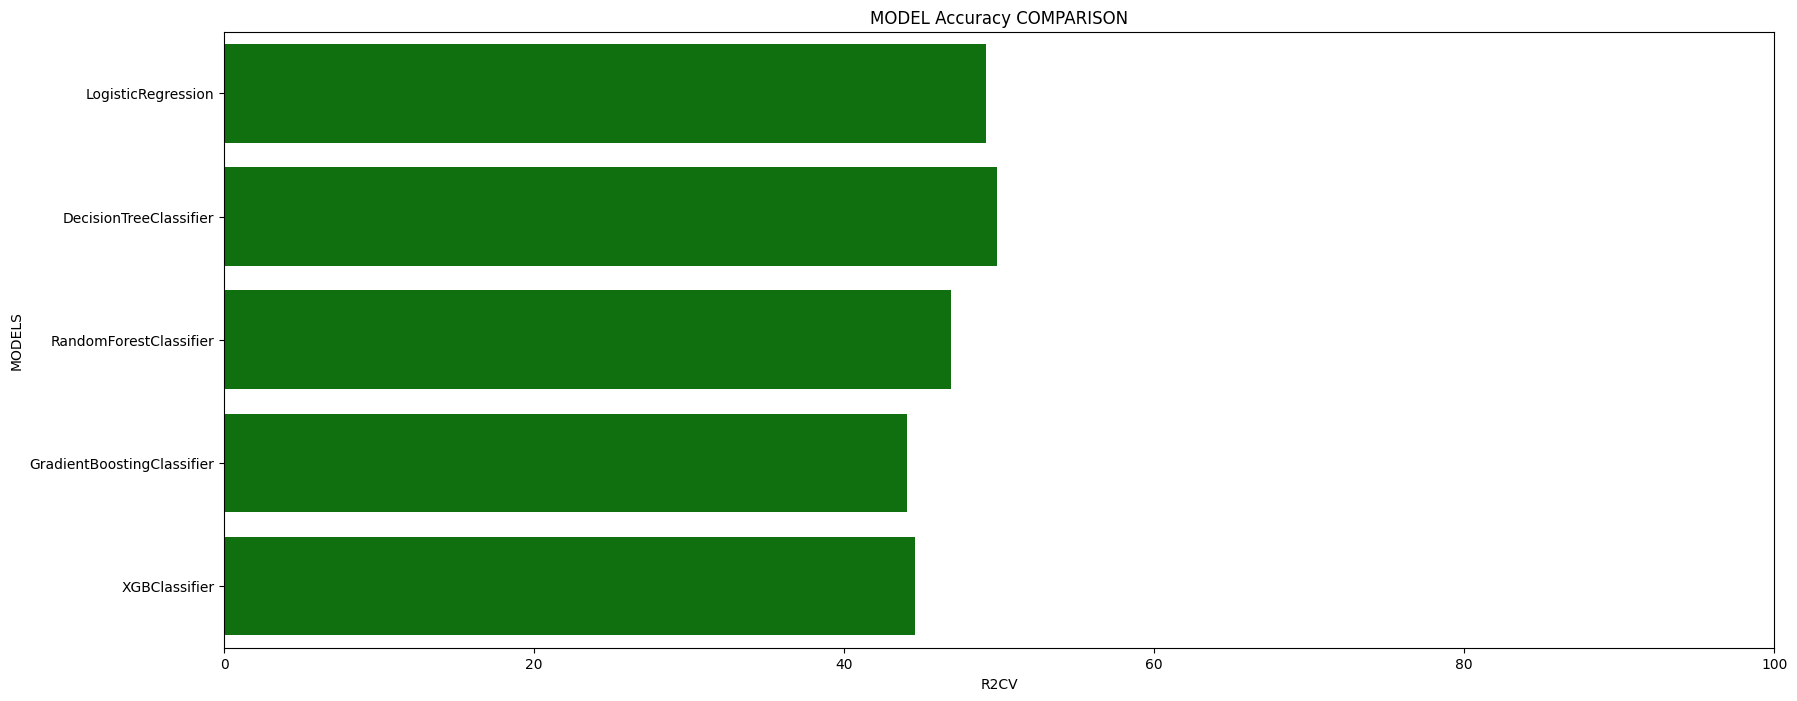

In [ ]:
r = pd.DataFrame(columns=["MODELS","R2CV"])
for model in models:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,X_test,Y_test,cv=10,verbose=False).mean()
    result = pd.DataFrame([[name,R2CV*100]],columns=["MODELS","R2CV"])
    r = r.append(result)

figure = plt.figure(figsize=(20,8))
sns.barplot(x="R2CV",y="MODELS",data=r,color="g")
plt.xlabel("R2CV")
plt.ylabel("MODELS")
plt.xlim(0,100)
plt.title("MODEL Accuracy COMPARISON")
plt.show()

Accuracy score ranking: Decision Tree > Logistic Regression (OvR) > Random Forest > XGB classifier > Gradient Boost > Knn


Overall accuracy score is low across all models, this could be due to noise and distribution of the variables in the dataset. For example, white blood cell count remains not normally distributed after log transformation. In addition, according to the feature importance graph above, most of the features have little importance on the random forest model, similar is observed for the gradient boosting model (not shown).To increase accuracy of the models, more data need to be obtained to train the model and improve the models.